# HW02 — EDA и контроль качества данных

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('S02-hw-dataset.csv')
df.shape

(41, 5)

In [11]:
# Первичный осмотр
display(df.head())
print('--- info() ---')
df.info()
print('--- describe() ---')
display(df.describe(include='all').T)


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


--- info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
--- describe() ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,41.0,NaN,NaN,NaN,20.243902,11.659289,1.0,10.0,20.0,30.0,40.0
age,39.0,NaN,NaN,NaN,36.512821,18.304259,5.0,24.0,33.0,45.5,120.0
country,41,5,RU,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchases,41.0,NaN,NaN,NaN,4.829268,2.710189,-1.0,3.0,5.0,7.0,11.0
revenue,41.0,NaN,NaN,NaN,820.04878,613.127269,0.0,432.0,693.0,1115.0,2475.0


In [12]:
# Пропуски и дубликаты
print('Доля пропусков по столбцам:')
display(df.isna().mean().round(3))

print('Количество полностью дублирующих строк:', df.duplicated().sum())

# Если есть дубликаты — покажем несколько примеров
if df.duplicated().any():
    display(df[df.duplicated(keep=False)].head())
else:
    print('Дубликатов не обнаружено.')


Доля пропусков по столбцам:


user_id      0.000
age          0.049
country      0.000
purchases    0.000
revenue      0.000
dtype: float64

Количество полностью дублирующих строк: 1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [13]:
# Базовый EDA: частоты и группировки
# Частоты для категориальной переменной 'country' (если есть)
if 'country' in df.columns:
    print('Топ-значения country:')
    display(df['country'].value_counts().head())

# Группировка: средние и суммы по странам для количественных колонок
group_cols = []
for c in ['purchases','revenue','age']:
    if c in df.columns:
        group_cols.append(c)

if 'country' in df.columns and group_cols:
    grp = df.groupby('country')[group_cols].agg(['mean','median','sum','count'])
    display(grp)

if 'age' in df.columns:
    df['age_bin'] = pd.cut(df['age'], bins=[0,18,30,45,60,100], labels=['<18','18-30','30-45','45-60','60+'])
    print('Распределение по возрастным группам:')
    display(df['age_bin'].value_counts(dropna=False))


Топ-значения country:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

purchases                       revenue                       \
             mean median sum count         mean  median    sum count   
country                                                                
CN       4.500000    4.5   9     2  1054.000000  1054.0   2108     2   
DE       6.500000    6.0  39     6  1445.500000  1200.0   8673     6   
FR       4.250000    6.0  51    12   675.916667   619.5   8111    12   
RU       4.769231    6.0  62    13   790.076923   650.0  10271    13   
US       4.625000    4.0  37     8   557.375000   537.5   4459     8   

               age                      
              mean median    sum count  
country                                 
CN       24.000000   24.0   48.0     2  
DE       34.600000   35.0  173.0     5  
FR       46.250000   42.0  555.0    12  
RU       30.076923   26.0  391.0    13  
US       36.714286   39.0  257.0     7

Распределение по возрастным группам:


age_bin
30-45    14
18-30    13
45-60     9
NaN       3
<18       2
60+       0
Name: count, dtype: int64

**Краткие наблюдения:**

- Доминирует RU и FR.
- В FR самые взрослые в датасете, revenue больше всех в DE (в среднем)
- Больше всего 18-45 людей


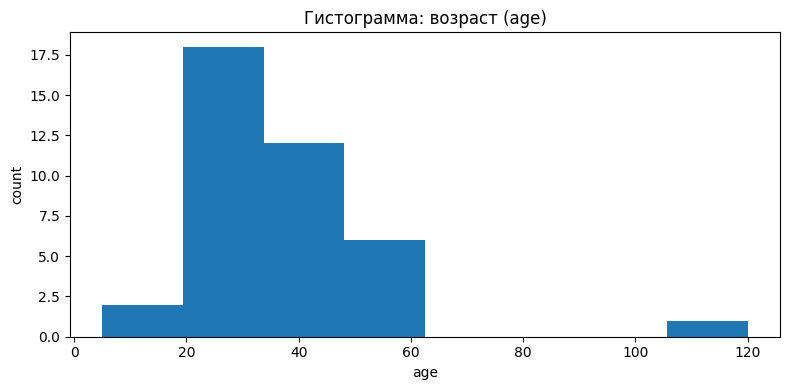

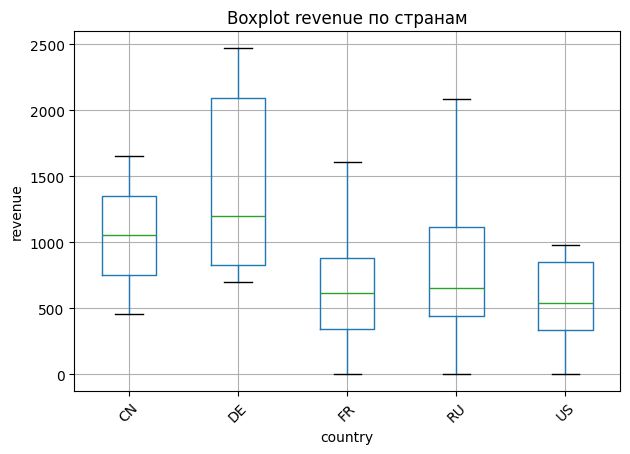

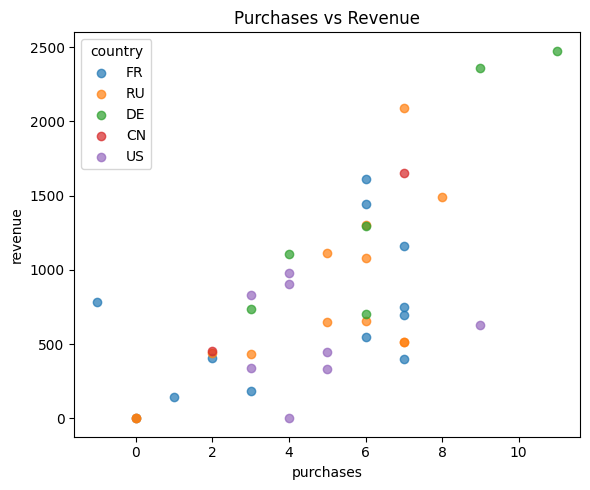

<Figure size 800x400 with 0 Axes>

In [14]:
# Визуализации: histogram, boxplot, scatter
import matplotlib.pyplot as plt
import os

fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)

# 1) Гистограмма возраста
if 'age' in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df['age'].dropna(), bins=8)
    plt.xlabel('age')
    plt.ylabel('count')
    plt.title('Гистограмма: возраст (age)')
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir, 'hist_age.png'))
    display(plt.gcf())
    plt.close()

# 2) Боксплот revenue по странам
if set(['revenue','country']).issubset(df.columns):
    plt.figure(figsize=(8,4))
    df_box = df.dropna(subset=['revenue','country'])
    df_box.boxplot(column='revenue', by='country', rot=45)
    plt.title('Boxplot revenue по странам')
    plt.suptitle('')  # remove automatic title
    plt.xlabel('country')
    plt.ylabel('revenue')
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir, 'boxplot_revenue_by_country.png'))
    display(plt.gcf())
    plt.close()

# 3) Scatter: purchases vs revenue (цвет - country, если есть)
if set(['purchases','revenue']).issubset(df.columns):
    plt.figure(figsize=(6,5))
    if 'country' in df.columns:
        countries = df['country'].unique()
        for c in countries:
            sub = df[df['country']==c]
            plt.scatter(sub['purchases'], sub['revenue'], label=c, alpha=0.7)
        plt.legend(title='country')
    else:
        plt.scatter(df['purchases'], df['revenue'], alpha=0.7)
    plt.xlabel('purchases')
    plt.ylabel('revenue')
    plt.title('Purchases vs Revenue')
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir, 'scatter_purchases_revenue.png'))
    display(plt.gcf())
    plt.close()
